In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import json
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
import matplotlib.ticker as mtick
from pylab import *
import collections
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
df1 = pd.read_json (r'train.json')
file=r'train.json'
df1.head()


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


<font size='3'><b>Number of recipes</b></font>

In [ ]:
import random
rec_ids=set(df1.id)
N=len(rec_ids)


<font size='3'><b>Number of Cuisines</b></font>

In [102]:
cui=set(df1.cuisine)
len(cui)

20

<font size='3'><b>Number of Unique Ingredients</b></font>

In [103]:
%%time
nb_ing = []
for ingredient in df1['ingredients']:
   #ingredients += ingredient
   nb_ing.extend(ingredient)

Wall time: 46.1 ms


In [8]:
len(nb_ing)

428275

In [104]:
import random
uniq_ing=set(nb_ing)
all_ing=list(uniq_ing)

#nat_bask
#nature basket has 6000 unique ingredients. Kitchen basket(set of ingredients) is a subset of nature basket.
#NB or KB rae basket of ingredienst of basket of recipes????

<font size='3'><b>Assignment-2 Question-1</b></font>

1. Implement the following copy-mutate algorithm for the data of recipes from Kaggle: [20]
1. Start with Epoch =0 and Number of Recipes Per Epochs = Round (Number of
recipes/Number of Epochs)
2. Initiate the primordial cuisine (t = 0), Nature Basket and the Kitchen Basket:
- Size of recipes = (say) 10
- Number of recipes at t = 0, NR
t=0 = 500

- Size of Kitchen Basket = 50
- NR
t=0 ≫ Size of KB

3. Pick a random recipe from the primordial kitchen for the ‘modification’.
4. Pick an ingredient randomly from the chosen recipe & one from KB compare the
ingredients.
5. If the KB ingredient is not the same as recipe ingredient replace the latter with the
former.
6. Repeat Steps 4—5 until the Recipe gets modified.
7. Add the new ‘modified/mutated’ recipe to the Kitchen Basket if the same isn’t there
already.
8. Repeat 3—7 until the number of recipes reaches the desired number of the next Epoch.
9. Analyze the cuisine for the recipe size as well as the frequency-rank statistics the end of
each Epoch.

<font size='3'><b>Defining initial recipe pool and Epoch=0. </b></font>

<font size='3'><b>Parameters:</b></font>

<font size='2'>Randomized cuisine contains 30000 recipes</font>

<font size='2'>Nature Basket = 6000 ingredients(randomly taken from 6714 unique ingredients from kaggle data).</font>

<font size='2'>M ratio = 6000/30000 = 1/5. </font>
    
<font size='2'>    No. of epochs = 10. </font>
    
<font size='2'>    Recipes per epoch = 30000/10 = 3000. </font>
    
<font size='2'>    Size of kitchen Basket = 3000/5 = 600 (random ingredients from Nature basket)
</font>

<font size='3'><b> Readme </b></font>

1. Fitness value was assigned using rand function to all the ingredients in the nature basket (NB- #6000).

2. A kitchen basket(kit_bask_0) containing 600 ingredients was created by taking ingredients randomly from nature basket. 

3. Primordial cuisine(pri_cui) contained 500 recipe of 10 recipe size by randomly choosing ingredients from kitchen basket.

4. 2500 recipes were created by copying a random recipe from primordial cuisine and then mutating it and added to primordial cuisine.

5. Ingredient(i) was randomly taken from a random recipe(rand_rec) and its fitness was compared with an ingredient(j) chosen randomly from kitchen basket(kit_bask_0). If fitness of (j) > fitness (i), j replaced i in rand_rec. If rand_rec was not found in pri_cui created. Then the rand_rec was added to the cuisine.   

6. Ingredients left in nature basket(NB_left_0) to be used were 5400 for epoch=1. 

7. Ingredients and recipes chosen for mutation were printed. 

8. The M ratio is 1/5. No. of epoch were 10. 3000 recipes were added in each epoch, Step 5 repeated. Kit_bask and NB_left was updated after each epoch. At the end of epoch=9, all 6000 ingredients were exhausted from Nature basket. 

No. of ingredients in nature basket for epoch=1 would be 6000-100 = 5400
Initial recipe pool size 500
Initial no. of recipes in primodial cuisine after epoch=0 3000


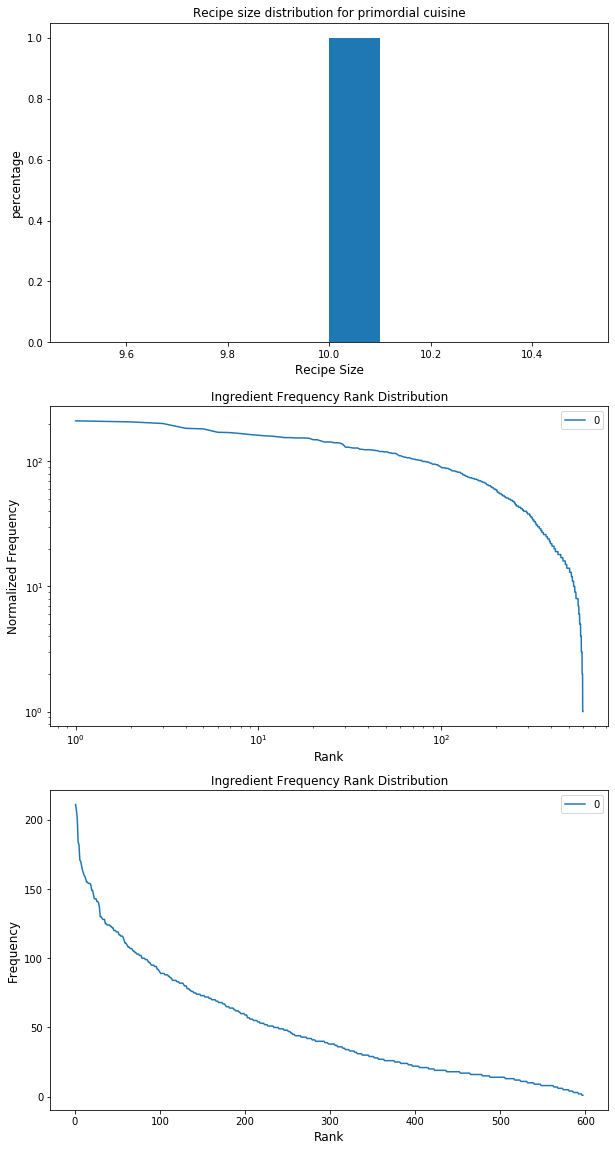

In [107]:
#print(%%time)
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
import random
#parameters considered  
size_rec=10                       # avg recipe size of cuisine; 10
Rec=30000                         # total number of recipes after 10 epochs will be near 30000
NB=random.sample(all_ing,6000)    #list of ingredients in the nature basket;6000
M_ratio=len(NB)/Rec          # recipe to ingredient ratio; 1/5
no_of_epochs= 10                  # m, size of initial ingredient pool in kitche basket;10
no_of_recipe_per_epoch=round(30000/10)   # Number of recipes per epoch 3000
KB_size=600                       # no_of_recipe_per_epoch*M_ratio ; 600                           
mut=1                             # no. of mutations
R_size=500                        # initial recipe pool 


epoch=0
l=locals()

#assign fitness function to all the ingredients in Nature basket
NB_fit={}
for ing in NB:
    NB_fit[ing]=float(np.random.random(1))


# initial ingredient pool or kitchen basket
m=100
n=500
#kit_bask_0=random.sample(NB,m)
kit_bask_0=random.sample(NB,KB_size)
NB_left_0=[x for x in NB if x not in kit_bask_0]
print("No. of ingredients in nature basket for epoch=1 would be 6000-100 =",len(NB_left_0))    # updated nature basket after epoch=0 for epoch=1

# initial recipe pool, ro
pri_cui=[]
d={}
for i in range(500):
    d["r0_%d"%(i+1)]=random.sample(kit_bask_0,10)
    pri_cui.append(d["r0_%d"%(i+1)])
print("Initial recipe pool size",len(pri_cui))

# start copy-mutate model till 3000 recipes, first epoch
Epoch=0   
dic0={}

#for i in range(3000-n):
while len(pri_cui)<3000:
        rand_rec=[]
        new_rec=[]
        rand_rec=random.choice(pri_cui)            #pick a random recipe from cuisine
        i=random.choice(rand_rec)                  #pick a random ingredient from random recipe chosen
        j=random.choice(kit_bask_0)              #pick a random ingredient from kitchen basket
        #print('Ingredient chosen randomly from a random recipe in randomized cuisine is',i,"&",'ingredient chosen randomly from kitchen basket is',j)
        #print('Random recipe',rand_rec)
        index=rand_rec.index(i)
        if NB_fit[j] > NB_fit[i] :
            #new_rec=[]
            new_rec=rand_rec
            new_rec[index]=j   #replace the ingredient i with ingredient j in rand recipe and create a new recipe , if fitness of j > fitness of i
            #print('New recipe after mutation of random recipe',new_rec,'at position',index+1)
            pri_cui.append(new_rec)
        else:
            continue
            #print(NB_fit[j],NB_fit[i],'no change')

print("Initial no. of recipes in primodial cuisine after epoch=0 %d"%len(pri_cui))

############## recipe size distribution(delta function)

fig = plt.figure()
size=[]
for i in range(len(pri_cui)):
    k=pri_cui[i]
    size.append(len(k))

#print(size,len(size))

df_ro=pd.DataFrame(data=size, columns=["ingredients_num"])
df_ro.head()
ax1 = fig.add_subplot(3,1,1)
#ax1.hist(x=df_ro['ingredients_num'], bins=30, color='#0504aa')
data=df_ro['ingredients_num']
weights = np.ones_like(np.array(data))/float(len(np.array(data)))
ax1.hist(data, weights=weights)
final_cui=pri_cui
ax1.set_title('Recipe size distribution for primordial cuisine',fontsize=12)
ax1.set_xlabel('Recipe Size',fontsize=12)
ax1.set_ylabel('percentage',fontsize=12)

ingredients = []
for ingredient in pri_cui:
   #ingredients += ingredient
    ingredients.extend(ingredient)

#################### frequency size distribution

df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
df_all_ing.head()
series_ing=df_all_ing['Ingredient_name'].value_counts()
df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
df_ing['Rank'] = np.arange(1,len(df_ing)+1)
ax2 = fig.add_subplot(312)
#ax2=df_ing.frequency.plot.line()
x=df_ing.Rank
y=df_ing.frequency
ax2.loglog(x,y,label=epoch,color=c)
ax2.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
ax2.set_xlabel('Rank',fontsize=12)
ax2.set_ylabel('Normalized Frequency',fontsize=12)
ax2.legend()

ax2 = fig.add_subplot(313)
ax3=sns.lineplot(x="Rank", y="frequency",data=df_ing,label=epoch, color=c)
ax3.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
ax3.legend()
ax3.set_xlabel('Rank',fontsize=12)
ax3.set_ylabel('Frequency',fontsize=12)
    
    #plt.gcf().set_size_inches(20, 5)
plt.gcf().set_size_inches(10,20)


<font size='3'><b> Analysis </b></font>

<b>Recipe Size Distribution</b>

3000 recipes of recipe size 10 were created after epoch=0. 
The ingredients with lower fitness values were replaced with the ingredients with higher fitness values, but the recipe size was unchanged, due to which the recipe-size distribution is a delta function with recipe size(x-axis) 10 for all the 3000 recipes .

<b>Ingredient Rank Distribution</b>

*Ingredient Rank distribution graph is following the power law curve, with a relatively slow decrease in frequency. (Y = -αX)

*At the start, major part of the graph is almost parallel to the x axis till 100th rank , i.e frequency is almost the same in those ranks.

*Gradually towards the last part of graph, there is a large drop which represents the ingredients that are very rarely used in the recipes.

*Kitchen basket was initiated by randomly picking 600 ingredients from the nature basket, that  why the Rank on x-axid varies from 1-600.


<font size='3'><b> Defining epoch 1-9.</b></font>

<font size='2'>Adding 3000 recipes per epoch to randomized cuisine and performing copy-mutate after every epoch. Updating the kitchen basket(size=600) and Nature basket(6000-KB)after every epoch.</font>


############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 5400 Nature basket size for next epoch 4800
Number of recipes in our cuisine after epoch=1 6000
#################### end of epoch 1 #################################
############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 4800 Nature basket size for next epoch 4200
Number of recipes in our cuisine after epoch=2 9000
#################### end of epoch 2 #################################
############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 4200 Nature basket size for next epoch 3600
Number of recipes in our cuisine after epoch=3 1

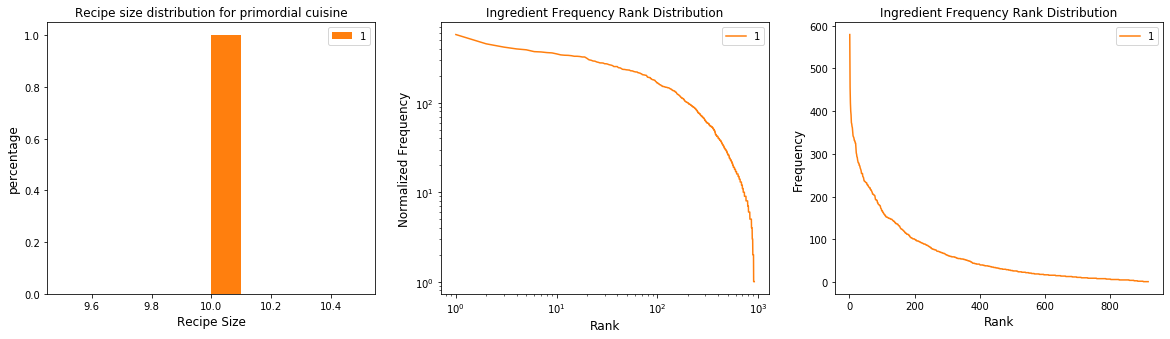

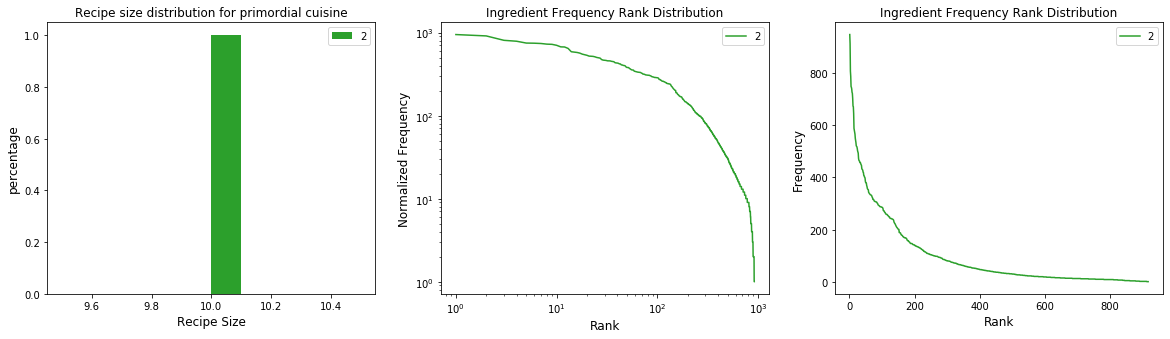

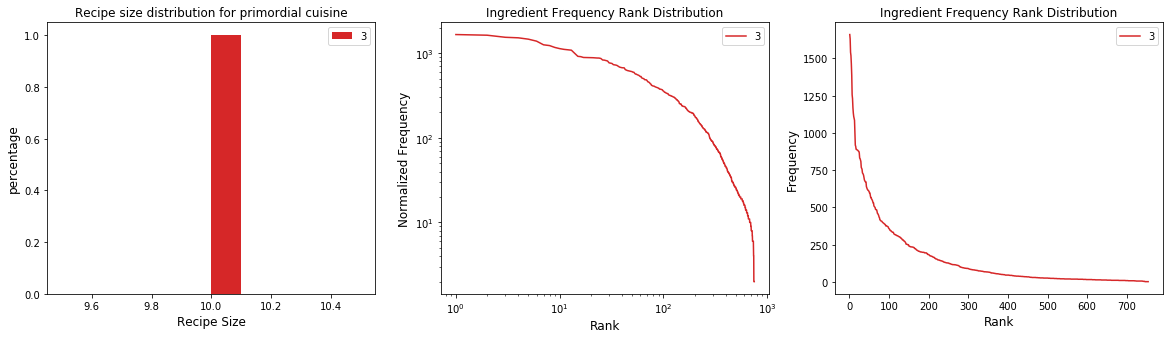

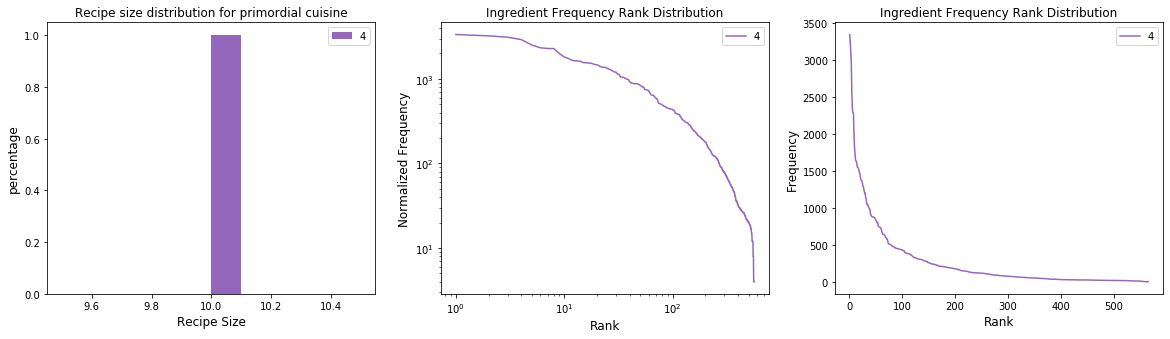

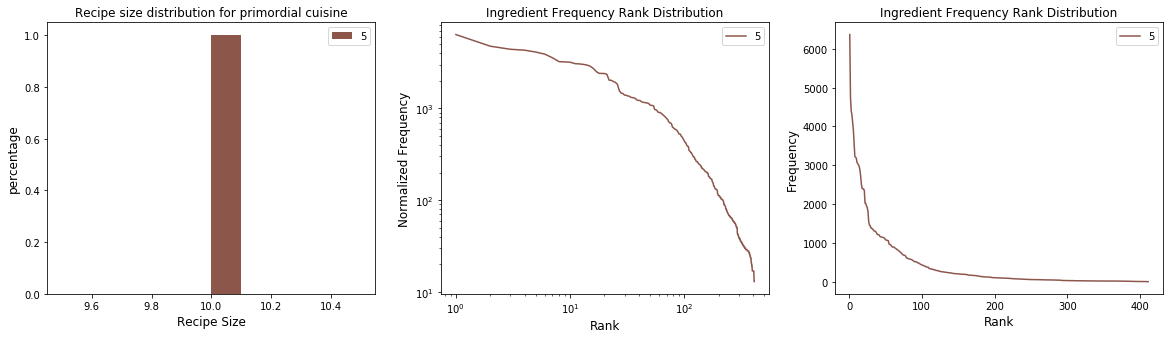

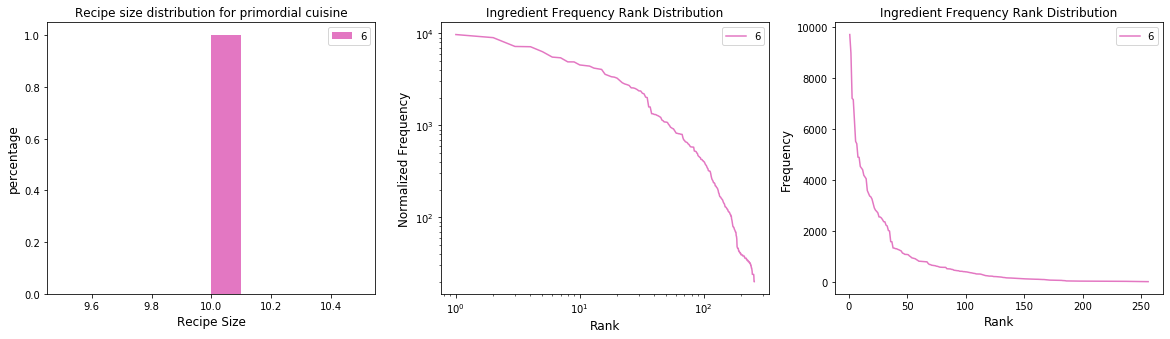

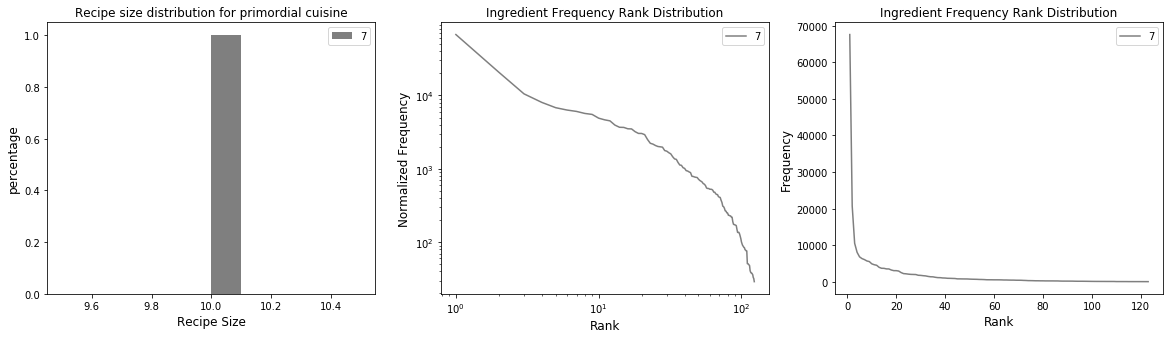

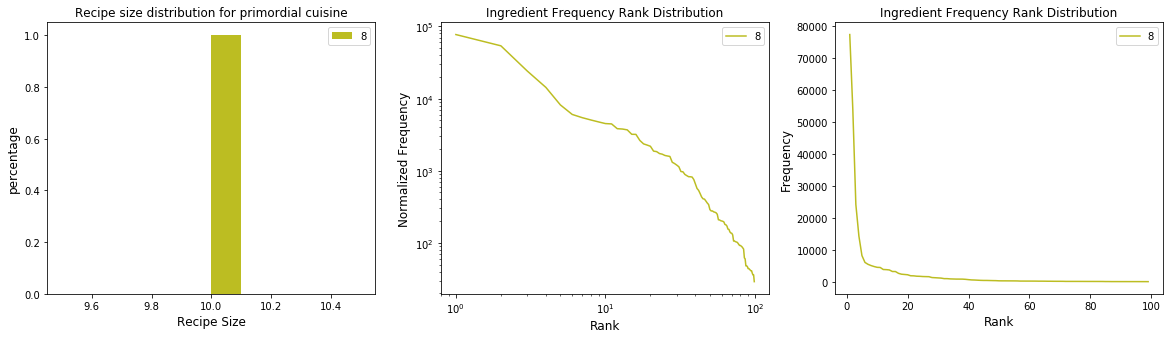

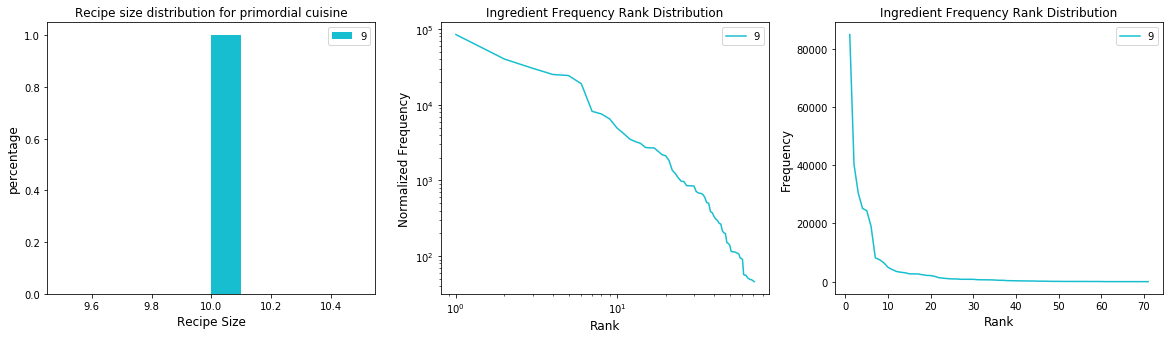

In [108]:
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
l=locals()
import random
dic2={}
for epoch in range(1,10):
    
    print('############  updating kitchen basket after every epoch #####################')
    dic2={}     #l['group' + str(i)]
    l['kit_bask_'+str(epoch)]=random.sample(l['NB_left_'+str(epoch-1)],KB_size)    # create a new kitchen basket of 600 ingredients from left nature basket

    print('###########  updating nature basket after every epoch #########################')
    
    l['NB_left_'+str(epoch)]=[x for x in l['NB_left_'+str(epoch-1)] if x not in l['kit_bask_'+str(epoch)] ]
    print("Nature basket size for this epoch",len(l['NB_left_'+str(epoch-1)]),"Nature basket size for next epoch",len(l['NB_left_'+str(epoch)]))
    
    ########### adding 3000 recipes to primordial cuisine in every epoch #################
    
    while len(pri_cui)< (epoch+1)*3000:
        
        rand_rec=random.choice(pri_cui)            #pick a random recipe from cuisine
        i_rest=random.choice(rand_rec)             #pick a random ingredient from random recipe chosen
        j_rest=random.choice(l['kit_bask_'+str(epoch)]) #pick a random ingredient from kit_bask_1(epoch)
        #print(i_rest,"&",j_rest)
        index=rand_rec.index(i_rest)

        if NB_fit[j_rest] > NB_fit[i_rest] :
            new_rec=[]
            rand_rec[index]=j_rest            #replace the ingredient i with ingredient j in rand recipe and create a new recipe , if fitness of j > fitness of i
            new_rec=rand_rec                  # check whether it is present in tpri_cui or not
            pri_cui.append(new_rec)         # add that new recipe to the primordial cuisine
            #print('length',len(pri_cui))
        else:
            continue
            
    ########  recipe size distribution ##############
    fig = plt.figure()
    size=[]
    for i in range(len(pri_cui)):
        k=pri_cui[i]
        size.append(len(k))

    df_ro=pd.DataFrame(data=size, columns=["ingredients_num"])
    df_ro.head()
    ax1 = fig.add_subplot(131)
    c = next(colors)["color"]
    data=df_ro['ingredients_num']
    weights = np.ones_like(np.array(data))/float(len(np.array(data)))
    ax1.hist(data, weights=weights,color=c,label=epoch)
    ax1.set_title('Recipe size distribution for primordial cuisine',fontsize=12)
    ax1.set_xlabel('Recipe Size',fontsize=12)
    ax1.set_ylabel('percentage',fontsize=12)
    ax1.legend()
    ingredients = []
    for ingredient in pri_cui:
       #ingredients += ingredient
        ingredients.extend(ingredient)

    #################### frequency size distribution ##################

    df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
    df_all_ing.head()
    series_ing=df_all_ing['Ingredient_name'].value_counts()
    df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
    df_ing['Rank'] = np.arange(1,len(df_ing)+1)


    ax2 = fig.add_subplot(132)
    #    

    x=df_ing.Rank
    y=df_ing.frequency
    #plt.loglog(x,y, basex=np.e, basey=np.e)
    ax2.loglog(x,y,label=epoch,color=c)
    ax2.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
    ax2.legend()
    ax2.set_xlabel('Rank',fontsize=12)
    ax2.set_ylabel('Normalized Frequency',fontsize=12)

    ax3 = fig.add_subplot(133)
    ax3=sns.lineplot(x="Rank", y="frequency",data=df_ing,label=epoch, color=c)
    ax3.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
    ax3.legend()
    ax3.set_xlabel('Rank',fontsize=12)
    ax3.set_ylabel('Frequency',fontsize=12)

    plt.gcf().set_size_inches(20, 5)
    print("Number of recipes in our cuisine after epoch=%d %d"%(epoch,len(pri_cui)))
    print("#################### end of epoch %d #################################"%epoch)
print("Final no. of recipes in randomized cuisine %d"%len(pri_cui))

<font size='3'><b> ANALYSIS</b></font>

RECIPE SIZE DISTRIBUTION

Recipe-size distribution which shows percentage of recipes with a partcular recipe size at that epoch is same for all the epochs, delta dunction with recipe size 10 suggesting that all the 30000 recipes created by copy-mutate were of size 10 with 1 probability.




<font size='3'><b> After Epoch=0.Defining epoch 1-9. Only Ingredient Frequency Rank distribution for all epochs in one plot.</b></font>

<font size='2'>Adding 3000 recipes per epoch to randomized cuisine and performing copy-mutate after every epoch. Updating the kitchen basket(size=600) and Nature basket(6000-KB)after every epoch.</font>

############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 5400 Nature basket size for next epoch 4800
############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 4800 Nature basket size for next epoch 4200
############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 4200 Nature basket size for next epoch 3600
############  updating kitchen basket after every epoch #####################
###########  updating nature basket after every epoch #########################
Nature basket size for this epoch 3600 Nature basket size for next epoch 3000
############  updating kitchen basket after every epoch 

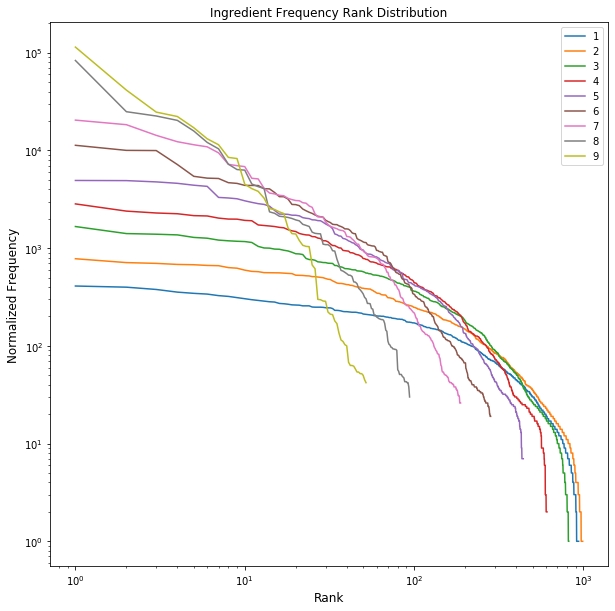

In [85]:
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
l=locals()
import random
dic2={}
for epoch in range(1,10):
    
    print('############  updating kitchen basket after every epoch #####################')
    dic2={}     #l['group' + str(i)]
    l['kit_bask_'+str(epoch)]=random.sample(l['NB_left_'+str(epoch-1)],KB_size)    # create a new kitchen basket of 600 ingredients from left nature basket

    print('###########  updating nature basket after every epoch #########################')
    
    l['NB_left_'+str(epoch)]=[x for x in l['NB_left_'+str(epoch-1)] if x not in l['kit_bask_'+str(epoch)] ]
    print("Nature basket size for this epoch",len(l['NB_left_'+str(epoch-1)]),"Nature basket size for next epoch",len(l['NB_left_'+str(epoch)]))
    
    ########### adding 3000 recipes to primordial cuisine in every epoch #################
    
    while len(pri_cui)< (epoch+1)*3000:
        
        rand_rec=random.choice(pri_cui)                 #pick a random recipe from cuisine
        i_rest=random.choice(rand_rec)                  #pick a random ingredient from random recipe chosen
        j_rest=random.choice(l['kit_bask_'+str(epoch)]) #pick a random ingredient from kit_bask_1(epoch)
        #print(i_rest,"&",j_rest)
        index=rand_rec.index(i_rest)
            
    ingredients = []
    for ingredient in pri_cui:
       #ingredients += ingredient
        ingredients.extend(ingredient)

    #################### frequency size distribution ##################

    df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
    df_all_ing.head()
    series_ing=df_all_ing['Ingredient_name'].value_counts()
    df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
    df_ing['Rank'] = np.arange(1,len(df_ing)+1)
    x=df_ing.Rank
    y=df_ing.frequency
    #plt.loglog(x,y, basex=np.e, basey=np.e)
    c=['red','yellow','pink','violet','black','blue','green','cyan','grey']
    plt.loglog(x,y,label=epoch)
plt.title('Ingredient Frequency Rank Distribution',fontsize=12)
plt.legend()
plt.xlabel('Rank',fontsize=12)
plt.ylabel('Normalized Frequency',fontsize=12)


plt.gcf().set_size_inches(10, 10)

print("############################ end of epoch %d #####################################"%epoch)




<b> ANALYSIS </b>

INGREDIENT RANK DISTRIBUTION

The no. of ingredients in the randomized cuisine increases with 600 in every epoch staring from 1200 to 6000.

With increasing epoch the distribution converges to follow "L-shaped" curve suggesting "L-curve" of Power Law, with a tall-head
and a long-tail. It can only be monotonously decreasing function

It can be observed that the difference between the most frequent and least frequent ingredient is quite large.

Epoch=0,1,2 and 3 have some recipes with very low ingredient frequencies while epoch =6,7,8 and 9 have ingredients with minimum frequency of occurence lying between 10-100. 

Even the difference among the more frequent ingredients is also large indicated by this huge dip in frequency till
10th rank, after that frequency of almost all the ingredients seems similar represented by a nearly straight line indicating that certain ingredients are used more frequently used.

<font size='4'><b>QUESTION 2</b></font>

2. Improvise the above algorithm to incorporate ingredient deletion as well as addition as

opposed to only replacement. Analyze the cuisine for the recipe size as well as the frequency-
rank statistics the end of each Epoch. What is the complexity of these algorithms.

Solution: TIME COMPLEXITY: In computer science, the time complexity is the computational complexity that describes the amount of time it takes to run an algorithm. Time complexity is commonly estimated by counting the number of elementary operations performed by the algorithm, supposing that each elementary operation takes a fixed amount of time to perform.

<b>PARAMETERS</b>

<font size='2'>Randomized cuisine contains 30000 recipes</font>

<font size='2'>Nature Basket = 6000 ingredients(randomly taken from 6714 unique ingredients from kaggle data).</font>

<font size='2'>M ratio = 6000/30000 = 1/5. </font>
    
<font size='2'> No. of epochs = 6. </font>
    
<font size='2'> Recipes per epoch = 30000/6 = 5000. </font>
    
<font size='2'> Size of kitchen Basket = 5000/5 = 1000 (random ingredients from Nature basket)
</font>


Size of nature basket for epoch=1 5000
Initial recipe pool size 500
Initial no. of recipes in primodial cuisine after epoch=0 5000


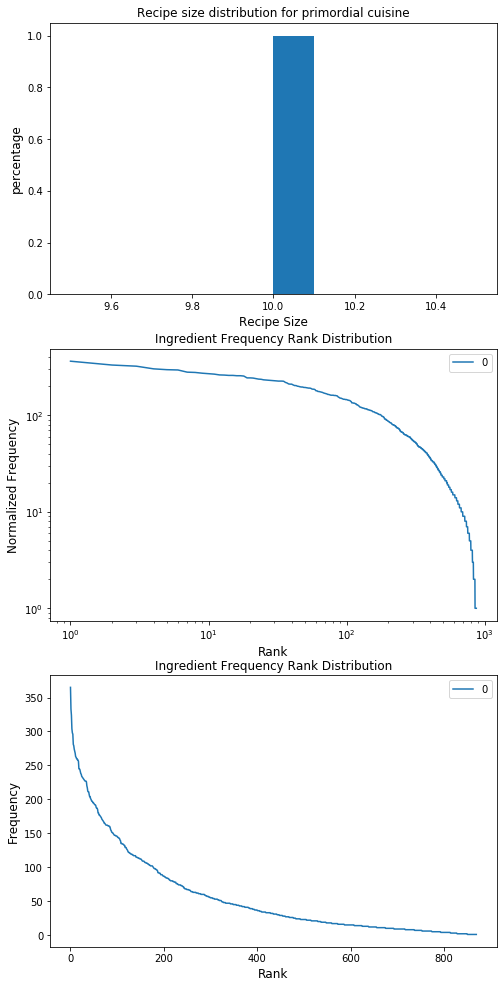

In [109]:
Epoch=0         #REPLACEMENT
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
import random
#parameters considered  
size_rec=10                       # avg recipe size of cuisine; 10
Rec=30000                        # total number of recipes, len(Rec); 30000
NB=random.sample(all_ing,6000)    #list of ingredients in the nature basket;6000
M_ratio=len(NB)/Rec        # recipe to ingredient ratio; 1/5

### 2 epochs for replacement, 2 for addition and 2 for deletion of ingredients - 6 epochs, 5000 recipes will be added in every epoch

no_of_epochs= 6                  # m, size of initial ingredient pool in kitche basket;10
no_of_recipe_per_epoch=30000/6    # 5000 recipes in every epoch will be added in every epoch
KB_size=1000                       # no_of_recipe_per_epoch*M_ratio ; 5000/5=1000                           
mut=1                             # no. of mutations
R_size=500                        # initial recipe pool 


epoch=0
l=locals()

#assign fitness function to all the ingredients in Nature basket
NB_fit={}
for ing in NB:
    NB_fit[ing]=float(np.random.random(1))


# initial ingredient pool or kitchen basket , Io

kit_bask_0=random.sample(NB,KB_size)
NB_left_0=[x for x in NB if x not in kit_bask_0]
print("Size of nature basket for epoch=1",len(NB_left_0))    # updated nature basket after epoch=0 for epoch=1

# initial recipe pool, ro
pri_cui=[]
d={}
for i in range(500):
    d["r0_%d"%(i+1)]=random.sample(kit_bask_0,10)
    pri_cui.append(d["r0_%d"%(i+1)])

print("Initial recipe pool size",len(pri_cui))

#for i in range(3000-n):
while len(pri_cui)< 5000:
        rand_rec=[]
        new_rec=[]
        rand_rec=random.choice(pri_cui)            #pick a random recipe from cuisine
        i=random.choice(rand_rec)                  #pick a random ingredient from random recipe chosen
        j=random.choice(kit_bask_0)              #pick a random ingredient from kitchen basket
        #print('Ingredient chosen randomly from a random recipe in randomized cuisine is',i,"&",'ingredient chosen randomly from kitchen basket is',j)
        #print('Random recipe',rand_rec)
        index=rand_rec.index(i)
        if NB_fit[j] > NB_fit[i] :
            #new_rec=[]
            new_rec=rand_rec
            new_rec[index]=j   #replace the ingredient i with ingredient j in rand recipe and create a new recipe , if fitness of j > fitness of i
            #print('New recipe after mutation of random recipe',new_rec,'at position',index+1)
            pri_cui.append(new_rec)
# 
        else:
            continue

print("Initial no. of recipes in primodial cuisine after epoch=0 %d"%len(pri_cui))

############## recipe size distribution(delta function)

fig = plt.figure()
size=[]
for i in range(len(pri_cui)):
    k=pri_cui[i]
    size.append(len(k))

#print(size,len(size))

df_ro=pd.DataFrame(data=size, columns=["ingredients_num"])
df_ro.head()
ax1 = fig.add_subplot(3,1,1)
#ax1.hist(x=df_ro['ingredients_num'], bins=30, color='#0504aa')
data=df_ro['ingredients_num']
weights = np.ones_like(np.array(data))/float(len(np.array(data)))
ax1.hist(data, weights=weights)
final_cui=pri_cui
ax1.set_title('Recipe size distribution for primordial cuisine',fontsize=12)
ax1.set_xlabel('Recipe Size',fontsize=12)
ax1.set_ylabel('percentage',fontsize=12)

ingredients = []
for ingredient in pri_cui:
   #ingredients += ingredient
    ingredients.extend(ingredient)

#################### frequency size distribution

df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
df_all_ing.head()
series_ing=df_all_ing['Ingredient_name'].value_counts()
df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
df_ing['Rank'] = np.arange(1,len(df_ing)+1)
ax2 = fig.add_subplot(312)
#ax2=df_ing.frequency.plot.line()
x=df_ing.Rank
y=df_ing.frequency
ax2.loglog(x,y,label=epoch,color=c)
ax2.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
ax2.set_xlabel('Rank',fontsize=12)
ax2.set_ylabel('Normalized Frequency',fontsize=12)
ax2.legend()

ax2 = fig.add_subplot(313)
ax3=sns.lineplot(x="Rank", y="frequency",data=df_ing,label=epoch, color=c)
ax3.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
ax3.legend()
ax3.set_xlabel('Rank',fontsize=12)
ax3.set_ylabel('Frequency',fontsize=12)

plt.gcf().set_size_inches(8, 17)




Ingredients left in nature basket 4000
Number of recipes in randomzied cuisine after epoch=1 10000


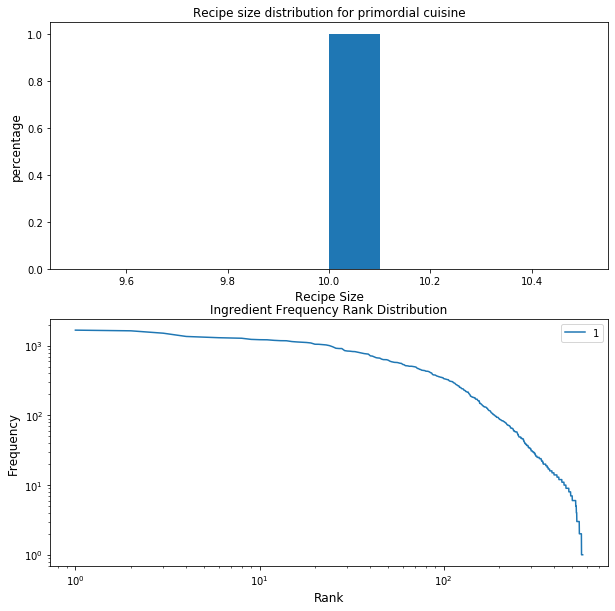

In [97]:
epoch=1               #REPLACEMENT
kit_bask_1=random.sample(NB_left_0,KB_size)
NB_left_1=[x for x in NB_left_0 if x not in kit_bask_1]
print('Ingredients left in nature basket',len(NB_left_1))    # updated nature basket after epoch=0 for epoch=1

while len(pri_cui) < (epoch+1)*5000:
        rand_rec=[]
        new_rec=[]
        rand_rec=random.choice(pri_cui)            #pick a random recipe from cuisine
        i=random.choice(rand_rec)                  #pick a random ingredient from random recipe chosen
        j=random.choice(kit_bask_0)              #pick a random ingredient from kitchen basket
        #print('Ingredient chosen randomly from a random recipe in randomized cuisine is',i,"&",'ingredient chosen randomly from kitchen basket is',j)
        #print('Random recipe',rand_rec)
        index=rand_rec.index(i)
        if NB_fit[j] > NB_fit[i] :
            #new_rec=[]
            new_rec=rand_rec
            new_rec[index]=j   #replace the ingredient i with ingredient j in rand recipe and create a new recipe , if fitness of j > fitness of i
            #print('New recipe after mutation of random recipe',new_rec,'at position',index+1)
            pri_cui.append(new_rec)

#             pri_cui.sort()
#             new_rec.sort()
#             if new_rec not in pri_cui: 
#                 pri_cui.append(new_rec)
#                 print('length',len(pri_cui))
#             else:
#                 continue
        else:
            continue

print("Number of recipes in randomzied cuisine after epoch=1 %d"%len(pri_cui))

##############recipe size distribution(delta function)

fig = plt.figure()
size=[]
for i in range(len(pri_cui)):
    k=pri_cui[i]
    size.append(len(k))

#print(size,len(size))

df_ro=pd.DataFrame(data=size, columns=["ingredients_num"])
df_ro.head()
ax1 = fig.add_subplot(2,1,1)
data=df_ro['ingredients_num']
weights = np.ones_like(np.array(data))/float(len(np.array(data)))
ax1.hist(data, weights=weights)
#ax1.hist(x=df_ro['ingredients_num'], bins=30, color='#0504aa')
#ax1=sns.distplot(df_ro['ingredients_num'], kde = True, hist= True,kde_kws = {'linewidth': 3})

ax1.set_title('Recipe size distribution for primordial cuisine',fontsize=12)
ax1.set_xlabel('Recipe Size',fontsize=12)
ax1.set_ylabel('percentage',fontsize=12)

ingredients = []
for ingredient in pri_cui:
   #ingredients += ingredient
    ingredients.extend(ingredient)

####################frequency size distribution

df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
df_all_ing.head()
series_ing=df_all_ing['Ingredient_name'].value_counts()
df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
df_ing['Rank'] = np.arange(1,len(df_ing)+1)
ax2 = fig.add_subplot(212)
#ax2=df_ing.frequency.plot.line()
x=df_ing.Rank
y=df_ing.frequency
ax2.loglog(x,y,label=epoch,color=c)
ax2.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
ax2.set_xlabel('Rank',fontsize=12)
ax2.set_ylabel('Frequency',fontsize=12)
ax2.legend()

plt.gcf().set_size_inches(10, 10)

#print(size,len(size))

<b>ANALYSIS</b>

- Primordial cuisine of 500 recipes each of size 10 was randomly built using ingredients from kitchen basket.

- Using copy-mutate algorithm for epoch=0 and epoch=1 , total 10000 recipes were added to randomzied cuisine with recipe size 10.

RECIPE SIZE DISTRIBUTION

-All 10000 recipes created were of size 10. That's why a delta function is formed with Recipe size on x-axis equal to 10 having probability 1.

INGREDIENT RANK DISTRIBUTION

- Follows power-law distribution for both the epochs.

- Most of the recipes had frequency of ingredients lying before 200th rank for epoch=0.

- Kitchen basket contains 1000 ingredients randomly taken from nature basketafter every epoch. The maximum rank could be 1000 for epoch 0 and 2000 for epoch 1.

- Till rank 100, the loglog plot of Freqr-Rank distribution was almost paralle to x-axis, suggesting that these ingredients have almost similar frequency.

EPOCHS 2-6


############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for this 2 epoch 4000 Nature basket size for next epoch 3000
#################### end of epoch 2 #################################
Number of recipes in our cuisine after epoch=2 15000
############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for this 3 epoch 3000 Nature basket size for next epoch 2000
#################### end of epoch 3 #################################
Number of recipes in our cuisine after epoch=3 20000
############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for this 4 epoch 2000 Nature basket size for next epoch 1000
############################ end of epoch 4

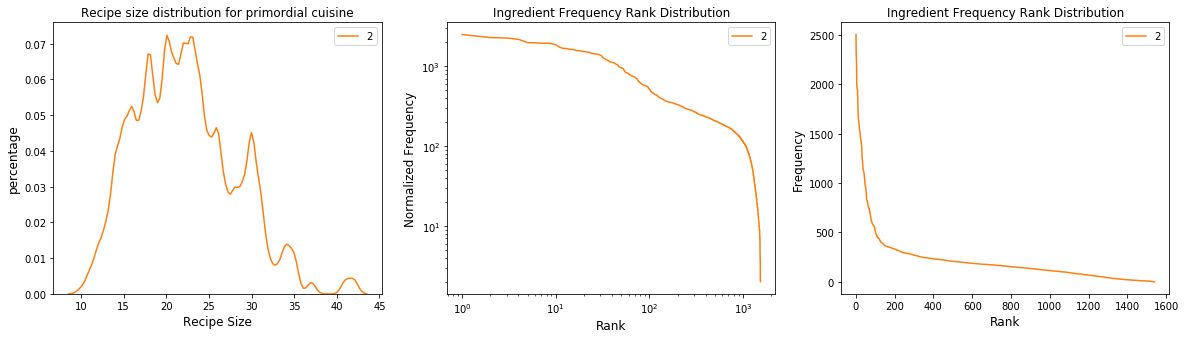

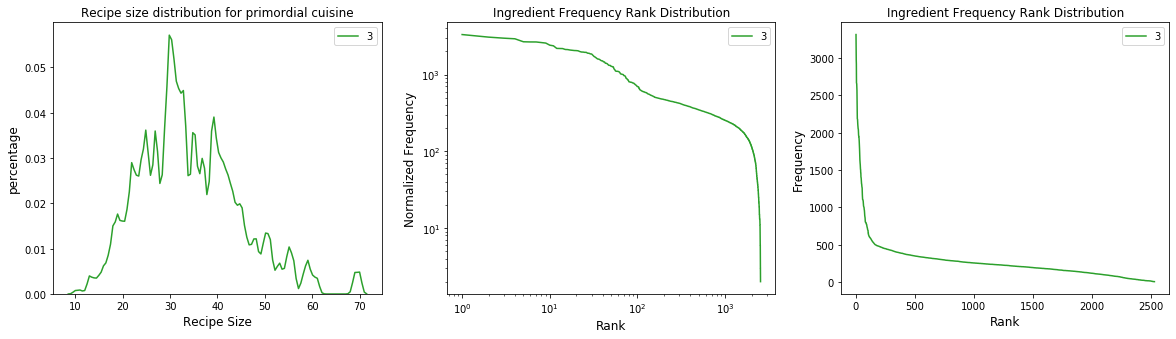

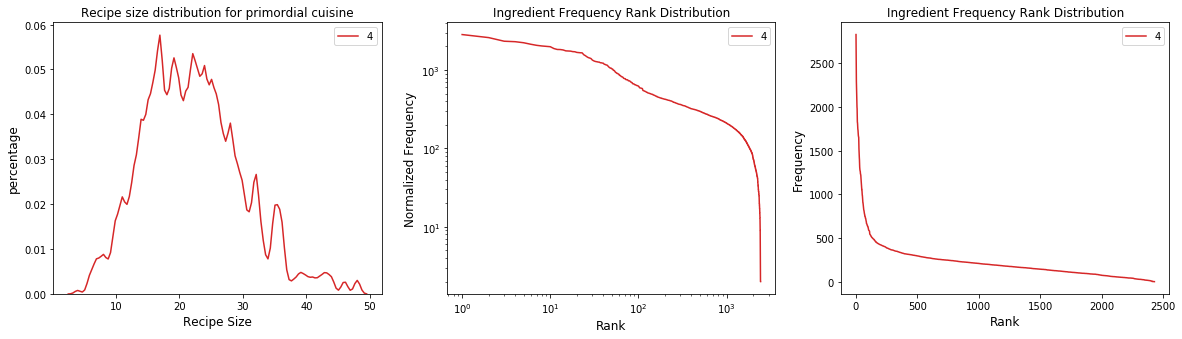

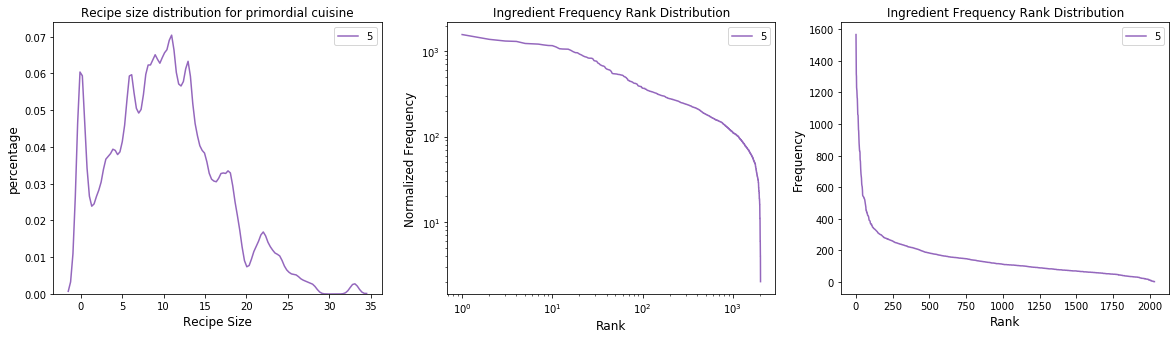

In [92]:
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
l=locals()
import random
dic2={}
for epoch in range(2,6):
    
    
    print('############  updating kitchen basket after every epoch #####################')
    dic2={}     
    l['kit_bask_'+str(epoch)]=random.sample(l['NB_left_'+str(epoch-1)],KB_size)    # create a new kitchen basket of 600 ingredients from left nature basket

    print('############  updating nature basket after every epoch #######################')
    
    l['NB_left_'+str(epoch)]=[x for x in l['NB_left_'+str(epoch-1)] if x not in l['kit_bask_'+str(epoch)] ]
    print("Nature basket size for this %d epoch"%epoch ,len(l['NB_left_'+str(epoch-1)]),"Nature basket size for next epoch",len(l['NB_left_'+str(epoch)]))
    ########### Addition of ingredients in copy-mutate model until 20000 recipes ##########
    
    if epoch == 2 or epoch==3: # ADDITION 
        
        while len(pri_cui)< (epoch+1)*5000:
        
            rand_rec_add=random.choice(pri_cui)                 #pick a random recipe from cuisine
            j_rest_add=random.choice(l['kit_bask_'+str(epoch-1)]) #pick a random ingredient from kit_bask_1(epoch)
            #j_rest_add=input("Enter an ingredient to be added to the random recipe: ") # user input ingredient
            #j_rest_add=random.sample(l['kit_bask_'+str(epoch)],2) #pick a random ingredient from kit_bask_1(epoch)
            new_rec_add=rand_rec_add
            new_rec_add.append(j_rest_add)                        #pick a random ingredient from kit_bask_1(epoch) and add it to random recipe
            pri_cui.append(new_rec_add)                           #add this new recipe to pri_cui
            #print("After addition new recipe",len(new_rec_add))
        print("#################### end of epoch %d #################################"%epoch)
        
    ########### Deletion of ingredients in copy-mutate model until 30000 recipes ##########
    
    else:                                          #DELETION
        
        while len(pri_cui)< (epoch+1)*5000:
            #print(epoch)
            rand_rec_del=random.choice(pri_cui)
            
            if len(rand_rec_del) != 0:
                
                i_rest_del=random.choice(rand_rec_del)              #i_rest_del=input("Enter any ingredient to delete from above recipe:")
                #print(i_rest_del)
                new_rec_del=rand_rec_del
                new_rec_del.remove(i_rest_del)#pick a random ingredient from kit_bask_1(epoch) and delete it to random recipe
#                 if len(new_rec_del) > 5:
                pri_cui.append(new_rec_del)
                    #print("After del",len(new_rec_del))
        
        print("############################ end of epoch %d ##############################" % epoch)
        
        
    ########  recipe size distribution ##############
    fig = plt.figure()
    size=[]
    for i in range(len(pri_cui)):
        k=pri_cui[i]
        size.append(len(k))

    df_ro=pd.DataFrame(data=size, columns=["ingredients_num"])
    df_ro.head()
    ax1 = fig.add_subplot(131)

    #ax1.plt.legend(epoch)
    c = next(colors)["color"]
    data=df_ro['ingredients_num']
    weights = np.ones_like(np.array(data))/float(len(np.array(data)))
    ax1=sns.kdeplot(np.array(data), bw=0.5,color=c,label=epoch)
    #ax1.hist(data, weights=weights,color=c,label=epoch)


    ax1.set_title('Recipe size distribution for primordial cuisine',fontsize=12)
    ax1.set_xlabel('Recipe Size',fontsize=12)
    ax1.set_ylabel('percentage',fontsize=12)
    ax1.legend()


    ingredients = []
    for ingredient in pri_cui:
       #ingredients += ingredient
        ingredients.extend(ingredient)

    #################### frequency size distribution ##################

    df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
    df_all_ing.head()
    series_ing=df_all_ing['Ingredient_name'].value_counts()
    df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
    df_ing['Rank'] = np.arange(1,len(df_ing)+1)


    ax2 = fig.add_subplot(132)
    #    

    x=df_ing.Rank
    y=df_ing.frequency
    #plt.loglog(x,y, basex=np.e, basey=np.e)
    ax2.loglog(x,y,label=epoch,color=c)
    ax2.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
    ax2.legend()
    ax2.set_xlabel('Rank',fontsize=12)
    ax2.set_ylabel('Normalized Frequency',fontsize=12)

    ax3 = fig.add_subplot(133)
    ax3=sns.lineplot(x="Rank", y="frequency",data=df_ing,label=epoch, color=c)
    ax3.set_title('Ingredient Frequency Rank Distribution',fontsize=12)
    ax3.legend()
    ax3.set_xlabel('Rank',fontsize=12)
    ax3.set_ylabel('Frequency',fontsize=12)

    plt.gcf().set_size_inches(20, 5)
    
    print("Number of recipes in our cuisine after epoch=%d %d"%(epoch,len(pri_cui)))
    
print("Final no. of recipes in randomized cuisine %d"%len(pri_cui))
  

<font size='3'><b> Only Ingredient Frequency Rank distribution for all epochs(2,3- Addition & 4,5- Deletion) in one plot. </b></font>

README

 5000 recipes added per epoch.1000 ingredients added to kitchen basket after every epoch. 

 Epoch=0 and Epoch=1 - Mutation 
 
 Epoch=2 and Epoch=3 - Addition. Random Recipe from which a random ingredient from updated kictchen basket was chosen for    addition. 
 
 Epoch=4 and Epoch=5 - Deletion. Length of random recipe chosen for deletion shall not be zero. 
 
 


############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for this 2 epoch 4000 Nature basket size for next epoch 3000
#################### end of epoch 2 #################################
############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for this 3 epoch 3000 Nature basket size for next epoch 2000
#################### end of epoch 3 #################################
############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for this 4 epoch 2000 Nature basket size for next epoch 1000
#################### end of epoch 4 #################################
############  updating kitchen basket after every epoch #####################
#

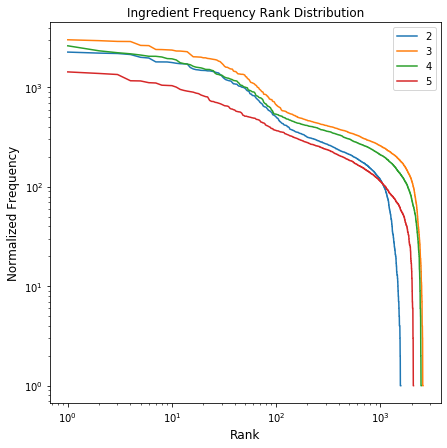

In [95]:
################## Run it after epoch=0 and epoch=1 #############
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
l=locals()
import random
dic2={}
    
for epoch in range(2,6):  
        
    
    print('############  updating kitchen basket after every epoch #####################')
    dic2={}     
    l['kit_bask_'+str(epoch)]=random.sample(l['NB_left_'+str(epoch-1)],KB_size)    # create a new kitchen basket of 600 ingredients from left nature basket

    print('############  updating nature basket after every epoch #######################')
    
    l['NB_left_'+str(epoch)]=[x for x in l['NB_left_'+str(epoch-1)] if x not in l['kit_bask_'+str(epoch)] ]
    print("Nature basket size for this %d epoch"%epoch ,len(l['NB_left_'+str(epoch-1)]),"Nature basket size for next epoch",len(l['NB_left_'+str(epoch)]))
    
    ########### Addition of ingredients in copy-mutate model until 20000 recipes ##########
    
    if epoch == 2 or epoch==3: # ADDITION 

        while len(pri_cui)< (epoch+1)*5000:

            rand_rec_add=random.choice(pri_cui)                 #pick a random recipe from cuisine
            j_rest_add=random.choice(l['kit_bask_'+str(epoch-1)]) #pick a random ingredient from kit_bask_1(epoch)
            #print(epoch)
            #j_rest_add=input("Enter an ingredient to be added to the random recipe: ") # user input ingredient
            #j_rest_add=random.sample(l['kit_bask_'+str(epoch)],2) #pick a random ingredient from kit_bask_1(epoch)
            #print(j_rest_add)
            new_rec_add=rand_rec_add
            new_rec_add.append(j_rest_add)                        #pick a random ingredient from kit_bask_1(epoch) and add it to random recipe
            pri_cui.append(new_rec_add)                           #add this new recipe to pri_cui
            #print("After addition new recipe",len(new_rec_add))
        print("#################### end of epoch %d #################################"%epoch)

     ########### Deletion of ingredients in copy-mutate model until 30000 recipes ##########

    else:                                          #DELETION

        while len(pri_cui)< (epoch+1)*5000:
            #print(epoch)
            rand_rec_del=random.choice(pri_cui)
            if len(rand_rec_del) != 0:

                i_rest_del=random.choice(rand_rec_del)              #i_rest_del=input("Enter any ingredient to delete from above recipe:")
                #print(i_rest_del)
                new_rec_del=rand_rec_del
                new_rec_del.remove(i_rest_del)#pick a random ingredient from kit_bask_1(epoch) and delete it to random recipe
    #                 if len(new_rec_del) > 5:
                pri_cui.append(new_rec_del)
        print("#################### end of epoch %d #################################"%epoch)
                 #print("After del",len(new_rec_del))

    ingredients = []
    for ingredient in pri_cui:
       #ingredients += ingredient
        ingredients.extend(ingredient)

#################### frequency size distribution ##################

    df_all_ing=pd.DataFrame(data=ingredients,columns=['Ingredient_name'])
    df_all_ing.head()
    series_ing=df_all_ing['Ingredient_name'].value_counts()
    df_ing=series_ing.rename_axis('Ingredient_name').reset_index(name='frequency')
    df_ing['Rank'] = np.arange(1,len(df_ing)+1)
    x=df_ing.Rank
    y=df_ing.frequency
    #plt.loglog(x,y, basex=np.e, basey=np.e)
    c=['red','yellow','pink','violet','black','blue','green','cyan','grey']
    plt.loglog(x,y,label=epoch)
plt.title('Ingredient Frequency Rank Distribution',fontsize=12)
plt.legend()
plt.xlabel('Rank',fontsize=12)
plt.ylabel('Normalized Frequency',fontsize=12)


plt.gcf().set_size_inches(7,7)

print("############################ end of epoch %d ##################################################"%epoch)




<b> ANALYSIS </b>

Ingredient Frequency Rank distribution for all the epochs follow a similar curve which is a power law curve instead of an exponential decreasing curve.

With increasing epoch the curve gets more defined.

Addition or deletion has not much affected the distribution. The frequency of most and least frequent ingredients for all the epochs were almost similar which is slightly different from simple copy-mutate algorithm.

Overall frequency plot distribution is same in both indicating that as frequency of ingredients increases the rank of that 
ingredient also increases.






############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for  2 epoch 4000 Nature basket size for next epoch 3000
#################### end of epoch 2 #################################
############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for  3 epoch 3000 Nature basket size for next epoch 2000
#################### end of epoch 3 #################################
############  updating kitchen basket after every epoch #####################
############  updating nature basket after every epoch #######################
Nature basket size for  4 epoch 2000 Nature basket size for next epoch 1000
#################### end of epoch 4 #################################
############  updating kitchen basket after every epoch #####################
############ 

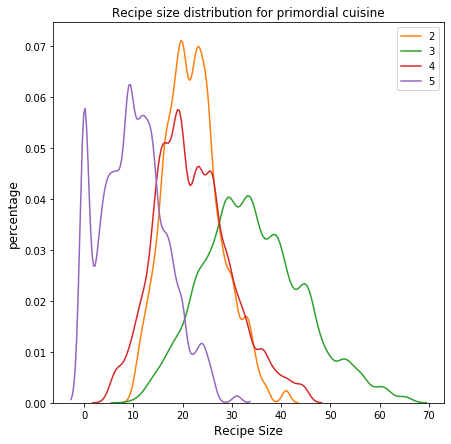

In [98]:
################## Run it after epoch=0 and epoch=1 #############
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]
l=locals()
import random
dic2={}
    
for epoch in range(2,6):  
    
    print('############  updating kitchen basket after every epoch #####################')
    dic2={}     
    l['kit_bask_'+str(epoch)]=random.sample(l['NB_left_'+str(epoch-1)],KB_size)    # create a new kitchen basket of 600 ingredients from left nature basket

    print('############  updating nature basket after every epoch #######################')
    
    l['NB_left_'+str(epoch)]=[x for x in l['NB_left_'+str(epoch-1)] if x not in l['kit_bask_'+str(epoch)] ]
    print("Nature basket size for  %d epoch"%epoch ,len(l['NB_left_'+str(epoch-1)]),"Nature basket size for next epoch",len(l['NB_left_'+str(epoch)]))
    
    ########### Addition of ingredients in copy-mutate model until 20000 recipes ##########
    
    if epoch == 2 or epoch==3: # ADDITION 

        while len(pri_cui)< (epoch+1)*5000:

            rand_rec_add=random.choice(pri_cui)                 #pick a random recipe from cuisine
            j_rest_add=random.choice(l['kit_bask_'+str(epoch-1)]) #pick a random ingredient from kit_bask_1(epoch)
            #j_rest_add=input("Enter an ingredient to be added to the random recipe: ") # user input ingredient
            new_rec_add=rand_rec_add
            new_rec_add.append(j_rest_add)                        #pick a random ingredient from kit_bask_1(epoch) and add it to random recipe
            pri_cui.append(new_rec_add)                           #add this new recipe to pri_cui
        print("#################### end of epoch %d #################################"%epoch)

    ########### Deletion of ingredients in copy-mutate model until 30000 recipes ##########

    else:                                          #DELETION

        while len(pri_cui)< (epoch+1)*5000:
            #print(epoch)
            rand_rec_del=random.choice(pri_cui)
            if len(rand_rec_del) != 0:

                i_rest_del=random.choice(rand_rec_del)              #i_rest_del=input("Enter any ingredient to delete from above recipe:")
                #print(i_rest_del)
                new_rec_del=rand_rec_del
                new_rec_del.remove(i_rest_del)#pick a random ingredient from kit_bask_1(epoch) and delete it to random recipe
                pri_cui.append(new_rec_del)
        print("#################### end of epoch %d #################################"%epoch)
                 #print("After del",len(new_rec_del))



    ingredients = []
    for ingredient in pri_cui:
       #ingredients += ingredient
        ingredients.extend(ingredient)

########  recipe size distribution ##############
    size=[]
    for i in range(len(pri_cui)):
        k=pri_cui[i]
        size.append(len(k))

    df_ro=pd.DataFrame(data=size, columns=["ingredients_num"])
    df_ro.head()
    #ax1 = fig.add_subplot(131)

    #ax1.plt.legend(epoch)
    c = next(colors)["color"]
    data=df_ro['ingredients_num']
    lp=sns.distplot(df_ro['ingredients_num'], hist = False, kde = True,kde_kws = {'linewidth': 1.5} ,label = epoch, color=c)
    #ax1.hist(data, weights=weights,color=c,label=epoch)

plt.title('Recipe size distribution for primordial cuisine',fontsize=12)
plt.xlabel('Recipe Size',fontsize=12)
plt.ylabel('percentage',fontsize=12)
plt.legend()
plt.gcf().set_size_inches(7,7)

<b>ANALYSIS</b>

RECIPE SIZE DISTRIBUTION

For epoch=2 and epoch=3, addition of ingredients to random recipes from the cuisine was done. Due to which the recipe size of ingredients has changed from 10 and due to the presence of variance in output density plot could be drawn and was found to follow nearly normal distribution.

Epoch 2 and 3 have have peaks at recipe size 20 and 30.

For epoch=2, the density is narrow (recipe size varied from 10-40)with percentage 0.07 representing that most the recipe sizes had recipe size varying between 15-30. 

For epoch=3, the density plot was more broad with recipe size varying from 10-70. 

While epochs 4 and 5 have peaks at recipe size 20 and 10. 

Epoch 4 had distribution similar to that of epoch =2, just it had shorter peak with recipe size varying between 0-50.

Epoch 5 had mojority of the recipe with recipe size varying between 0-30. 

Ingredient Addition had led to increase in recipe sizes while deletion had led to decrease in recipe sizes.

Certain issues developed from algorithm 1 like varying recipe size got resolved with algorithm 2.
Accordingly second algorithm gives more better results as recipe size can vary. 




<b>The complexity of algorithm is calculated as </b>

in Q1 it is simple copy-mutate algorithm where -
1) 10 epochs were performed.

2) Recipe size was kept 10 per recipe

3) One ingredient was randomly picked and mutated with one ingredient from kitchen basket.

4) Ro is size of initial pool which is 500 and later increased to around 30,000. Nature basket had 6000 ingredients.

5) M is the ratio between size of pool of ingredient and pool of recipes which is need to be maintain which was 1/5 here. Using the ratio kitchen basket size was maintained, i.e. 600.

Here, recipe size distribution shows delta function and the size of recipes remain constant.
The ingredient is picked randomly and gets mutated based on the fitness value keeping in mind that recipe size 
remains constant as 10

<b> TIME COMPLEXITY FOR PRIMORDIAL CUISINE CREATION AND RECIPE FORMATION BY COPY MUTATE</b>

NB_left_0=[x for x in NB if x not in kit_bask_0] // For this block O(n) # kitchen basket updation

for i in range(500): // For this block O(n)

while len(pri_cui)< 3000: // For this block O(n) in Q1
while len(pri_cui)< 5000: // For this block O(n) in Q2

Thus time complexity of this part is same in both questions= O(n) + O(n) + O(n)  = O(n)
    

 

in Q2

<b> TIME COMPLEXITY FOR INGREDIENT ADDITION / DELETION </b>

for epoch in range(2,7): // O(n)

   l['NB_left_'+str(epoch)]=[x for x in l['NB_left_'+str(epoch-1)] if x not in l['kit_bask_'+str(epoch)] ] // O(m)
  
   while len(pri_cui)< (epoch+1)*5000: // O(k) 

   while len(pri_cui)< (epoch+1)*5000: // O(k)

Now, O(k) > O(m) 

Thus the time complexity of the block = O(kn)

for i in range(len(pri_cui)): // O(n)

for ingredient in pri_cui:  // O(n) 

Thus the time complexity for the chunk = O(nk) + O(n) + O(n) 
                                       = O(nk)    
    

-Here, recipe size distribution shows gaussian function and the size of recipes does not remain constant.

-Ro is size of initial pool which is 500 and later increased to around 30,000. Nature basket had 6000 ingredients.

-The number of epochs were 6. 5000 recipes were added to the randomzied cuisine in every epoch. Kitchen basket size was kept 1000.

-For the initial two epochs copy-mutate algorithm was followed.The ingredients are picked randomly and compared based on the fitness value.

-For epoch-2 and 3, New ingredients are introduced after adding and for epoch 4 and 5 ingredients are deleted.

This addition and deletion results in varying recipe size.

Frequency rank shows the power law distribution based on copy mutate fitness random.




